# 2. **Preprocessing**

## Punctuations removal

First, let's try to remove by using the list of punctuations!

In [ ]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x

text = "It's a nice day[]"
print(remove_punctuation(text))

Its a nice day


Then, what about the the regular expression ([re package](https://docs.python.org/3/library/re.html))?

In [ ]:
import re

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    return x

text = "It's a nice day[]"
print(remove_punctuation_re(text))

Its a nice day


Emails addresses

In [ ]:
text = 'Contact: test@bok.or.kr, 010-1234-5678'
text = re.sub(r'[a-zA-Z0-9._]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}', '', text)
print(text)

Contact: , 010-1234-5678


Cell phone numbers

In [ ]:
text = 'Contact: test@bok.or.kr, 010-1234-5678'
text = re.sub(r'01[0|1|6|7|8|9]-\d{3,4}-\d{4}', '', text)
print(text)

Contact: test@bok.or.kr, 


## Stopwords removal
Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = sw.words('english')
print(len(stop_words))
print(stop_words)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [ ]:
my_sent = 'Natural Language Processing is fun but challenging.'
tokens = word_tokenize(my_sent)

filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


## Case-folding
A common strategy is to do case-folding by reducing all letters to lower case

In [ ]:
text = 'Hello there!'
#Returns the result of converting all characters in text to lowercase.
print(text.lower())


#do we need to reduce all letters to lower case?
text2 = 'I love NLP :D'
print(text2.lower())

hello there!
i love nlp :d


## Stemming
Stemming is a process of removing and replacing word suffixes to arrive at a common root form of the word.

*   Try various types of NLTK stemmer in [demo](http://text-processing.com/demo/stem/)
*   A comparative study of stemming algorithm: [Paper Link](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)


In [ ]:
#let's try to test with porter algorithm
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


## Lemmatization

Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form


In [ ]:
#by NLTK Wordnet
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('cats'))
print(lemmatizer.lemmatize('cacti'))
print(lemmatizer.lemmatize('geese'))
print(lemmatizer.lemmatize('rocks'))
print(lemmatizer.lemmatize('python'))
print(lemmatizer.lemmatize('better', pos='a'))
print(lemmatizer.lemmatize('best', pos='a'))
print(lemmatizer.lemmatize('run'))
print(lemmatizer.lemmatize('run','v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


cat
cactus
goose
rock
python
good
best
run
run


## Tokenization

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation

Try various types of NLTK Tokenizer in [demo](http://text-processing.com/demo/tokenize/).

[NLTK Tokeniser API Doc](https://www.nltk.org/api/nltk.tokenize.html)

**TreebankWordTokenizer**

The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank.

In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = 'I am so happy :) ;)'

print(tknzr.tokenize(s0))

s0 = 'I am so sad :('

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


**TweetTokenizer: Twitter-aware tokeniser**

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

s0 = 'I am so happy :) ;)'

print(tknzr.tokenize(s0))

s0 = 'I am so sad :('

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


## Wikipedia and Word Cloud
*   [Wikipedia Python](https://pypi.org/project/wikipedia/)
*   [Word Cloud](https://amueller.github.io/word_cloud/index.html)

In [ ]:
!pip install -q wikipedia

  Preparing metadata (setup.py) ... done


In [ ]:
from wordcloud import WordCloud
import wikipedia

# Getting wikipedia contents
text = wikipedia.page('Natural_language_processing').content
print(text[:1000])

Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics. It is primarily concerned with giving computers the ability to support and manipulate speech. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.
Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.


== History ==

Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing 

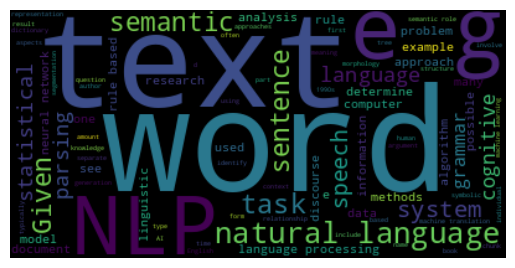

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Try more word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

# Exercise
In this exercise, you are to preprocess the text data downloaded above.

In [ ]:
from nltk import sent_tokenize
sentences = sent_tokenize(text)
sentences

['Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics.',
 'It is primarily concerned with giving computers the ability to support and manipulate speech.',
 'It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e.',
 'statistical and, most recently, neural network-based) machine learning approaches.',
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.',
 'Challenges in natural language processing frequently involve speech recognition, natural-language understanding, and natural-language generation.',
 '== History ==\n\nNatural language processing has its roots in the 1950s.',
 'Already in 1950, Alan Turing publi

**Case Folding**

In [ ]:
sentences = [sentence.lower() for sentence in sentences]

**Remove punctuations [Please complete this section]**

please remove punctuations and multiple blanks.

In [ ]:
import re
def remove_punctuation_re(x):
    x = re.sub('[^\w\s]', '', x)
    # Please complete this
    x =
    return x

sentences = [remove_punctuation_re(sentence) for sentence in sentences]

**Tokenization [Please complete this section]**

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Please complete this
sentences =

**Remove stopwords [Please complete this section]**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words('english')

sentences_ns=[]
for tokens in sentences:
    # Please complete this
    filtered_sentence =
    sentences_ns.append(filtered_sentence)

**Lemmatisation [Please complete this section]**

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

sentences_le = []
for tokens in sentences_ns:
    # Please complete this
    lemma_sentence =
    sentences_le.append(lemma_sentence)